# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimiter import RateLimiter
import json
#from config import api_key

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [119]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities_df = pd.DataFrame({"city": cities})
#cities_df.head()

664

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [120]:
#Define url path for the api
url = "http://api.openweathermap.org/data/2.5/weather?"


#rate_limiter = RateLimiter(max_calls=50, period=60)

#print(query_url)
#response = requests.get(query_url)
#response_json = response.json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

#The first requirement is to create a series of scatter plots to showcase the following relationships:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

cities_df = pd.DataFrame({"city": cities})

#set up additional columns to hold information
cities_df['latitude'] = ""
cities_df['longitude'] = ""
cities_df["temperature"] = ""
cities_df['humidity'] = ""
cities_df['cloudiness'] = ""
cities_df['windspeed'] = ""

#cities_df.head()

#loop through the list of cities and perform a request for data on each
#iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    
    #get city from df
    city = row["city"]
    
    #assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city}")
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    #print(query_url)
    #extract results
    #results = response['results']
    
    try:
        cities_df.loc[index, 'latitude'] = response['coord']['lat']
        cities_df.loc[index, 'longitude'] = response['coord']['lon']
        cities_df.loc[index, 'temperature'] = response['main']['temp_max']
        cities_df.loc[index, 'humidity'] = response['main']['humidity']
        cities_df.loc[index, 'cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'windspeed'] = response['wind']['speed']
    except:
        print("Missing field.. skipping")
        
print("---------------")


Retrieving Results for Index 0: butaritari
Retrieving Results for Index 1: sola
Retrieving Results for Index 2: yellowknife
Retrieving Results for Index 3: qaanaaq
Retrieving Results for Index 4: hilo
Retrieving Results for Index 5: gueret
Retrieving Results for Index 6: upernavik
Retrieving Results for Index 7: ushuaia
Retrieving Results for Index 8: tiksi
Retrieving Results for Index 9: kudahuvadhoo
Retrieving Results for Index 10: punta arenas
Retrieving Results for Index 11: cape town
Retrieving Results for Index 12: hobart
Retrieving Results for Index 13: clyde river
Retrieving Results for Index 14: rikitea
Retrieving Results for Index 15: livingston
Retrieving Results for Index 16: plettenberg bay
Retrieving Results for Index 17: pokhara
Retrieving Results for Index 18: bluff
Retrieving Results for Index 19: tasiilaq
Retrieving Results for Index 20: dinard
Retrieving Results for Index 21: iqaluit
Retrieving Results for Index 22: vaini
Retrieving Results for Index 23: albany
Retri

Retrieving Results for Index 182: moron
Retrieving Results for Index 183: northam
Retrieving Results for Index 184: kuryk
Retrieving Results for Index 185: college
Retrieving Results for Index 186: ust-kuyga
Retrieving Results for Index 187: kloulklubed
Retrieving Results for Index 188: dikson
Retrieving Results for Index 189: itoman
Retrieving Results for Index 190: bitam
Retrieving Results for Index 191: iralaya
Retrieving Results for Index 192: mehamn
Retrieving Results for Index 193: ribeira grande
Retrieving Results for Index 194: maldonado
Retrieving Results for Index 195: waipawa
Retrieving Results for Index 196: kavieng
Retrieving Results for Index 197: fernley
Retrieving Results for Index 198: nanortalik
Retrieving Results for Index 199: cidreira
Retrieving Results for Index 200: kodiak
Retrieving Results for Index 201: rudbar
Retrieving Results for Index 202: cuamba
Retrieving Results for Index 203: roma
Retrieving Results for Index 204: mar del plata
Retrieving Results for I

Retrieving Results for Index 365: melendugno
Retrieving Results for Index 366: orlik
Retrieving Results for Index 367: vallenar
Retrieving Results for Index 368: maumere
Retrieving Results for Index 369: urumqi
Retrieving Results for Index 370: sambava
Retrieving Results for Index 371: kortkeros
Retrieving Results for Index 372: tianpeng
Retrieving Results for Index 373: slave lake
Retrieving Results for Index 374: nassau
Retrieving Results for Index 375: meulaboh
Retrieving Results for Index 376: kirksville
Retrieving Results for Index 377: bumbuna
Retrieving Results for Index 378: nola
Retrieving Results for Index 379: luan
Retrieving Results for Index 380: mahibadhoo
Retrieving Results for Index 381: hambantota
Retrieving Results for Index 382: byron bay
Retrieving Results for Index 383: murashi
Retrieving Results for Index 384: pirogovo
Retrieving Results for Index 385: mikhaylovsk
Retrieving Results for Index 386: saldanha
Retrieving Results for Index 387: songjianghe
Retrieving R

Retrieving Results for Index 548: royan
Retrieving Results for Index 549: charagua
Retrieving Results for Index 550: waitati
Retrieving Results for Index 551: rongcheng
Retrieving Results for Index 552: muana
Retrieving Results for Index 553: santa cruz del norte
Retrieving Results for Index 554: otjiwarongo
Retrieving Results for Index 555: jumla
Retrieving Results for Index 556: louisbourg
Missing field.. skipping
Retrieving Results for Index 557: eregli
Retrieving Results for Index 558: zhangjiakou
Retrieving Results for Index 559: karaul
Missing field.. skipping
Retrieving Results for Index 560: saint-francois
Retrieving Results for Index 561: quelimane
Retrieving Results for Index 562: haines junction
Retrieving Results for Index 563: svetlogorsk
Retrieving Results for Index 564: sutysky
Retrieving Results for Index 565: bandarbeyla
Retrieving Results for Index 566: zachagansk
Missing field.. skipping
Retrieving Results for Index 567: kanniyakumari
Retrieving Results for Index 568

In [121]:
#{"coord":{"lon":169.8464,"lat":-46.2817},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":293.11,"feels_like":292.86,"temp_min":293.11,"temp_max":293.11,"pressure":1006,"humidity":65,"sea_level":1006,"grnd_level":1005},"visibility":10000,"wind":{"speed":2.92,"deg":71,"gust":5.41},"clouds":{"all":24},"dt":1645153763,"sys":{"type":2,"id":2000217,"country":"NZ","sunrise":1645120749,"sunset":1645170619},"timezone":46800,"id":2208248,"name":"Kaitangata","cod":200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [122]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         664 non-null    object
 1   latitude     664 non-null    object
 2   longitude    664 non-null    object
 3   temperature  664 non-null    object
 4   humidity     664 non-null    object
 5   cloudiness   664 non-null    object
 6   windspeed    664 non-null    object
dtypes: object(7)
memory usage: 36.4+ KB


In [123]:
#cities_df.to_csv()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [124]:
#  Get the indices of cities that have humidity over 100%.


In [125]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

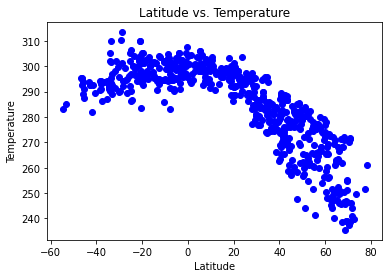

In [128]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["temperature"]).astype(float), facecolors="blue")
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature") 
plt.show()

## Latitude vs. Humidity Plot

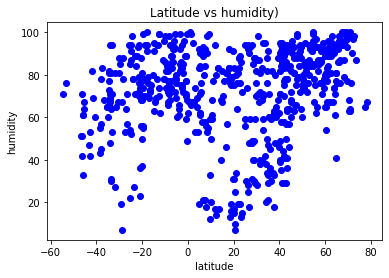

In [129]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["humidity"]).astype(float), facecolors="blue")
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title(f"Latitude vs humidity)")
plt.show()

## Latitude vs. Cloudiness Plot

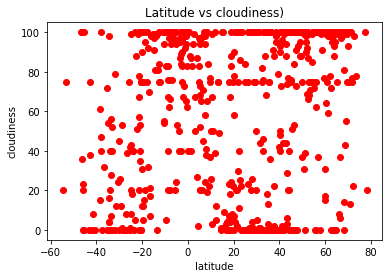

In [130]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["cloudiness"]).astype(float), color="red")
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title(f"Latitude vs cloudiness)")
plt.show()

## Latitude vs. Wind Speed Plot

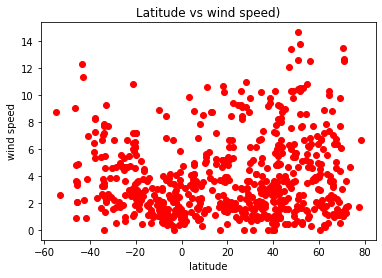

In [131]:
plt.scatter(pd.to_numeric(cities_df["latitude"]).astype(float), pd.to_numeric(cities_df["windspeed"]).astype(float), color="red")
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.title(f"Latitude vs wind speed)")
plt.show()

## Linear Regression

In [132]:
#create dataframes for northern (lat > 0) and southern hemisphere (lat < 0)
northern_df = cities_df.loc[pd.to_numeric(cities_df["latitude"]).astype(float) > 0, :]
northern_df.head()

,city,latitude,longitude,temperature,humidity,cloudiness,windspeed
0,butaritari,3.0707,172.7902,300.84,74,50,9.86
2,yellowknife,62.456,-114.3525,247.44,81,0,7.2
3,qaanaaq,77.484,-69.3632,251.43,65,100,1.69
4,hilo,19.7297,-155.09,296,91,75,0.45
5,gueret,46.1667,1.8667,282.73,93,100,3.55


In [133]:
southern_df = cities_df.loc[pd.to_numeric(cities_df["latitude"]).astype(float) < 0, :]
southern_df.head()

,city,latitude,longitude,temperature,humidity,cloudiness,windspeed
1,sola,-13.8833,167.55,301.31,69,98,1.16
7,ushuaia,-54.8,-68.3,282.96,71,20,8.75
10,punta arenas,-53.15,-70.9167,285.21,76,75,2.57
11,cape town,-33.9258,18.4232,293.77,69,0,7.2
12,hobart,-42.8794,147.3294,292.66,53,75,11.32


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8682657110148366


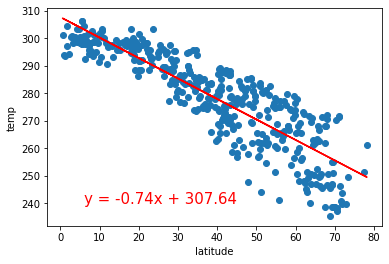

In [134]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['temperature']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,240),fontsize=15,color="red") ##<<- not appearing??
plt.xlabel('latitude')
plt.ylabel('temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39167365168132595


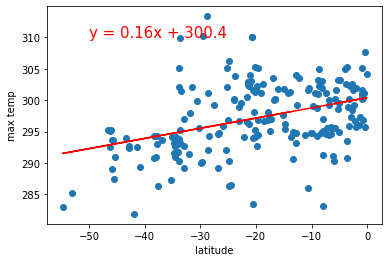

In [135]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['temperature']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,310),fontsize=15,color="red") ##<<- not appearing??
plt.xlabel('latitude')
plt.ylabel('max temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3772593207691625


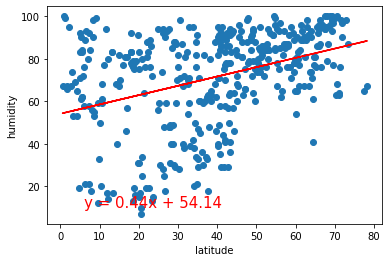

In [136]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4005044508805679


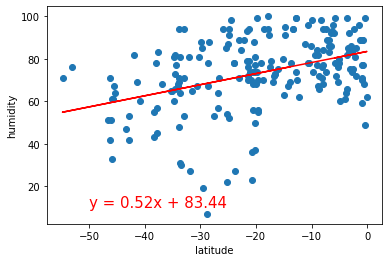

In [137]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2645182305232124


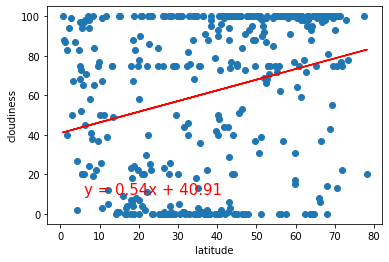

In [138]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.5104306653404556


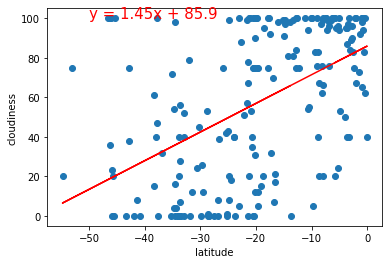

In [139]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09382737074131915


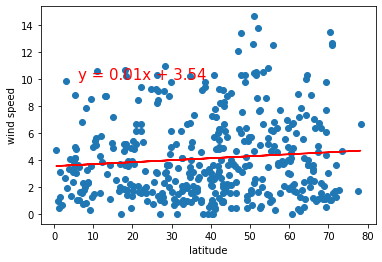

In [140]:
x_values = pd.to_numeric(northern_df['latitude']).astype(float)
y_values = pd.to_numeric(northern_df['windspeed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4163515621345934


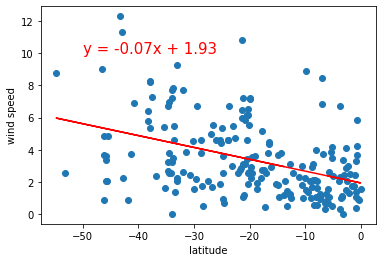

In [141]:
x_values = pd.to_numeric(southern_df['latitude']).astype(float)
y_values = pd.to_numeric(southern_df['windspeed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue}")
plt.show()

In [142]:
cities_df.to_csv("../output_data/weather.csv", index=False, header=True)